In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('data_with_blunder.csv')

In [ ]:
data

,board_position,move_number,white_castled,black_castled,white_move,average_rating,increment_code,next_move_blunder
0,rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR ...,1,False,False,True,1578.5,15+10,False
1,rnbqkb1r/pppppppp/5n2/8/3P4/8/PPP1PPPP/RNBQKBN...,2,False,False,False,1578.5,15+10,False
2,rnbqkb1r/pppppppp/5n2/8/3P1B2/8/PPP1PPPP/RN1QK...,3,False,False,True,1578.5,15+10,False
3,rnbqkb1r/pp1ppppp/5n2/2p5/3P1B2/8/PPP1PPPP/RN1...,4,False,False,False,1578.5,15+10,False
4,rnbqkb1r/pp1ppppp/5n2/2p5/3P1B2/4P3/PPP2PPP/RN...,5,False,False,True,1578.5,15+10,False
...,...,...,...,...,...,...,...,...
110068,5rk1/pb4pp/4p3/6Q1/2pP4/2P5/1q1N2PP/R5K1 w - -...,50,True,True,False,1656.5,15+10,False
110069,5rk1/Rb4pp/4p3/6Q1/2pP4/2P5/1q1N2PP/6K1 b - - ...,51,True,True,True,1656.5,15+10,True
110070,5rk1/Rb4pp/4p3/6Q1/2pP4/2P5/3N2PP/2q3K1 w - - ...,52,True,True,False,1656.5,15+10,True
110071,5rk1/Rb4pp/4p3/6Q1/2pP4/2P5/6PP/2q2NK1 b - - 2 27,53,True,True,True,1656.5,15+10,True


input 8x8x17x(5?)
output 1

In [ ]:
import numpy as np
def fen_to_array(fen: str):
    board, turn, castling = fen.split()[0], fen.split()[1], fen.split()[2]
    board_array = np.zeros((8, 8, 17), dtype=int)

    piece_map = {
        'P': 0, 'N': 1, 'B': 2, 'R': 3, 'Q': 4, 'K': 5,
        'p': 6, 'n': 7, 'b': 8, 'r': 9, 'q': 10, 'k': 11
    }

    row_idx = 0
    for row in board.split('/'):
        col_idx = 0
        for char in row:
            if char.isdigit():
                col_idx += int(char)
            else:
                piece_idx = piece_map[char]
                board_array[row_idx, col_idx, piece_idx] = 1
                col_idx += 1
        row_idx += 1

    white_king_castle = 1 if 'K' in castling else 0
    white_queen_castle = 1 if 'Q' in castling else 0
    black_king_castle = 1 if 'k' in castling else 0
    black_queen_castle = 1 if 'q' in castling else 0

    board_array[:, :, 12] = white_king_castle
    board_array[:, :, 13] = white_queen_castle
    board_array[:, :, 14] = black_king_castle
    board_array[:, :, 15] = black_queen_castle

    board_array[:, :, 16] = 1 if turn == 'w' else 0

    return board_array

In [ ]:
data.shape

(110073, 8)

In [ ]:
gameid = []
id_count = 0
prev = 0
for id, row in data.iterrows():
  if(row['move_number'] < prev):
    id_count += 1
  prev = row['move_number']
  gameid.append(id_count)
gameid

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,


In [ ]:
data_set = {
    'game_id' : gameid,
    'board_info' : data['board_position'].apply(fen_to_array),
    'move_number' : data['move_number'],
    'next_move_blunder' : data['next_move_blunder'],
    'increment_code' : data['increment_code'],
    'average_rating' : data['average_rating']
}
data_set = pd.DataFrame.from_dict(data_set)
data_set

,game_id,board_info,move_number,next_move_blunder,increment_code,average_rating
0,0,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1...",1,False,15+10,1578.5
1,0,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1...",2,False,15+10,1578.5
2,0,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1...",3,False,15+10,1578.5
3,0,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1...",4,False,15+10,1578.5
4,0,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1...",5,False,15+10,1578.5
...,...,...,...,...,...,...
110068,2181,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",50,False,15+10,1656.5
110069,2181,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",51,True,15+10,1656.5
110070,2181,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",52,True,15+10,1656.5
110071,2181,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",53,True,15+10,1656.5


In [ ]:
data_set['next_move_blunder'].value_counts()

,count
next_move_blunder,
False,100960
True,9113


In [ ]:
from sklearn.model_selection import train_test_split
unique_game_ids = data_set['game_id'].unique()

train_game_ids, test_game_ids = train_test_split(unique_game_ids, test_size=0.3, random_state=42)

train_data = data_set[data_set['game_id'].isin(train_game_ids)]
test_data = data_set[data_set['game_id'].isin(test_game_ids)]

print("Train Set:")
print(train_data)
print("\nTest Set:")
print(test_data)

Train Set:
        game_id                                         board_info  \
0             0  [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1...   
1             0  [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1...   
2             0  [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1...   
3             0  [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1...   
4             0  [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1...   
...         ...                                                ...   
110068     2181  [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...   
110069     2181  [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...   
110070     2181  [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...   
110071     2181  [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...   
110072     2181  [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...   

        move_number  next_move_blunder increment_code  average_rating  
0                 1              False          15+10          1578.5  
1   

In [ ]:
y_train = train_data['next_move_blunder']
y_test = test_data['next_move_blunder']


In [ ]:
y_train.to_csv("lr_y_train.csv")
y_test.to_csv("lr_y_test.csv")

In [ ]:
#linear regression
x_train = train_data[['board_info','move_number','increment_code','average_rating']]
y_train = train_data['next_move_blunder']
def flatten_board(board):
  return board.flatten()

flattened_boards = x_train['board_info'].apply(flatten_board)
flattened_df = pd.DataFrame(flattened_boards.tolist())
flattened_df = flattened_df.reset_index(drop=True)
x_train = x_train.reset_index(drop=True)
flattened_df.columns = ['board_dim_' + str(col) for col in flattened_df.columns]
X_train_cleaned = pd.concat([flattened_df, x_train.drop(columns=['board_info'])], axis=1)
X_train_cleaned

,board_dim_0,board_dim_1,board_dim_2,board_dim_3,board_dim_4,board_dim_5,board_dim_6,board_dim_7,board_dim_8,board_dim_9,...,board_dim_1081,board_dim_1082,board_dim_1083,board_dim_1084,board_dim_1085,board_dim_1086,board_dim_1087,move_number,increment_code,average_rating
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,1,1,0,1,15+10,1578.5
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,1,1,1,2,15+10,1578.5
2,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,1,1,0,3,15+10,1578.5
3,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,1,1,1,4,15+10,1578.5
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,1,1,0,5,15+10,1578.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,50,15+10,1656.5
77001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,51,15+10,1656.5
77002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,52,15+10,1656.5
77003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,53,15+10,1656.5


In [ ]:
# Assuming you have the test data available as 'test_data'
x_test = test_data[['board_info','move_number','increment_code','average_rating']]
y_test = test_data['next_move_blunder']

# Flatten the board info for the test data
flattened_boards_test = x_test['board_info'].apply(flatten_board)
flattened_df_test = pd.DataFrame(flattened_boards_test.tolist())
flattened_df_test = flattened_df_test.reset_index(drop=True)

# Reset the index for x_test
x_test = x_test.reset_index(drop=True)

# Rename columns for the flattened test data
flattened_df_test.columns = ['board_dim_' + str(col) for col in flattened_df_test.columns]

# Concatenate the flattened board data with the rest of the features in the test data
X_test_cleaned = pd.concat([flattened_df_test, x_test.drop(columns=['board_info'])], axis=1)

# Now X_test_cleaned can be used for prediction or evaluation
X_test_cleaned


,board_dim_0,board_dim_1,board_dim_2,board_dim_3,board_dim_4,board_dim_5,board_dim_6,board_dim_7,board_dim_8,board_dim_9,...,board_dim_1081,board_dim_1082,board_dim_1083,board_dim_1084,board_dim_1085,board_dim_1086,board_dim_1087,move_number,increment_code,average_rating
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,1,1,0,1,10+0,1662.5
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,1,1,1,2,10+0,1662.5
2,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,1,1,0,3,10+0,1662.5
3,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,1,1,1,4,10+0,1662.5
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,1,1,0,5,10+0,1662.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33063,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,60,15+10,1604.0
33064,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,61,15+10,1604.0
33065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,62,15+10,1604.0
33066,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,63,15+10,1604.0


In [ ]:

X_test_cleaned.to_csv("lr_x_test.csv")
X_train_cleaned.to_csv("lr_x_train.csv")

**Feature Engineering**

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Chess Project
%ls

ValueError: mount failed

In [ ]:
# import pandas as pd

# X_train_cleaned = pd.read_csv("dataset/lr_x_train.csv")
# X_test_cleaned = pd.read_csv("dataset/lr_x_test.csv")
# y_train = pd.read_csv("dataset/lr_y_train.csv")
# y_test = pd.read_csv("dataset/lr_y_test.csv")
# y_train = y_train.drop(columns=['Unnamed: 0'])
# y_test = y_test.drop(columns=['Unnamed: 0'])
# y_train = y_train.values.ravel()  # If y_train is a pandas Series or DataFrame column
# y_test = y_test.values.ravel()    # If y_test is a pandas Series or DataFrame column

In [ ]:
# X_train_clean_encoded = pd.get_dummies(X_train_cleaned, columns=['increment_code'], drop_first=False)
# X_test_clean_encoded = pd.get_dummies(X_test_cleaned, columns=['increment_code'], drop_first=False)
# X_train_clean_encoded = X_train_clean_encoded.drop(columns=['Unnamed: 0'])
# X_test_clean_encoded = X_test_clean_encoded.drop(columns=['Unnamed: 0'])

In [ ]:
import pandas as pd
import numpy as np

# Load CSV files
X_train_cleaned = pd.read_csv("dataset/lr_x_train.csv")
X_test_cleaned = pd.read_csv("dataset/lr_x_test.csv")
y_train = pd.read_csv("dataset/lr_y_train.csv")
y_test = pd.read_csv("dataset/lr_y_test.csv")

# Remove the unwanted "Unnamed: 0" column from y and flatten
y_train = y_train.drop(columns=['Unnamed: 0'])
y_test = y_test.drop(columns=['Unnamed: 0'])
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# One-hot encode the 'increment_code' column in the feature DataFrames
X_train_clean_encoded = pd.get_dummies(X_train_cleaned, columns=['increment_code'], drop_first=False)
X_test_clean_encoded = pd.get_dummies(X_test_cleaned, columns=['increment_code'], drop_first=False)

# Drop the "Unnamed: 0" column from the main DataFrames
X_train_clean_encoded = X_train_clean_encoded.drop(columns=['Unnamed: 0'])
X_test_clean_encoded = X_test_clean_encoded.drop(columns=['Unnamed: 0'])

# --------------------------------------------------------
# Step 1: Create a game_id column.
# Assume that the move_number column resets to 1 at the start of each game.
# We create a game_id by taking the cumulative sum of rows where move_number == 1.
# --------------------------------------------------------
X_train_clean_encoded['game_id'] = (X_train_clean_encoded['move_number'] == 1).cumsum()
X_test_clean_encoded['game_id'] = (X_test_clean_encoded['move_number'] == 1).cumsum()

In [ ]:
# --------------------------------------------------------
# Step 2: Convert board representation columns to int8 and then to sparse format.
# Assume the board representation columns start with "board_dim_".
# --------------------------------------------------------
board_cols = [col for col in X_train_clean_encoded.columns if col.startswith("board_dim_")]

# Convert these columns to int8
X_train_clean_encoded[board_cols] = X_train_clean_encoded[board_cols].astype(np.int8)
X_test_clean_encoded[board_cols] = X_test_clean_encoded[board_cols].astype(np.int8)

# Convert these columns to a sparse format to save memory.
for col in board_cols:
    X_train_clean_encoded[col] = pd.arrays.SparseArray(X_train_clean_encoded[col], fill_value=0)
    X_test_clean_encoded[col] = pd.arrays.SparseArray(X_test_clean_encoded[col], fill_value=0)

# --------------------------------------------------------
# Step 3: Add temporal features (last 3 moves board representation) for each game.
# Group by game_id, then shift the board representation columns by 1, 2, and 3 moves.
# --------------------------------------------------------
for shift in [1, 2, 3]:
    # Shift for the training set
    shifted_train = X_train_clean_encoded.groupby('game_id')[board_cols].shift(shift)
    shifted_train.columns = [f"{col}_t-{shift}" for col in board_cols]
    X_train_clean_encoded = pd.concat([X_train_clean_encoded, shifted_train], axis=1)

    # Shift for the test set
    shifted_test = X_test_clean_encoded.groupby('game_id')[board_cols].shift(shift)
    shifted_test.columns = [f"{col}_t-{shift}" for col in board_cols]
    X_test_clean_encoded = pd.concat([X_test_clean_encoded, shifted_test], axis=1)

# --------------------------------------------------------
# Step 4: After adding temporal features, fill NaNs with 0, cast to int8, and then convert to sparse format.
# --------------------------------------------------------
all_board_cols = [col for col in X_train_clean_encoded.columns if col.startswith("board_dim_")]
X_train_clean_encoded[all_board_cols] = X_train_clean_encoded[all_board_cols].fillna(0).astype(np.int8)
X_test_clean_encoded[all_board_cols] = X_test_clean_encoded[all_board_cols].fillna(0).astype(np.int8)

for col in all_board_cols:
    X_train_clean_encoded[col] = pd.arrays.SparseArray(X_train_clean_encoded[col], fill_value=0)
    X_test_clean_encoded[col] = pd.arrays.SparseArray(X_test_clean_encoded[col], fill_value=0)

# Optionally, inspect the resulting DataFrame structure and memory usage.
print(X_train_clean_encoded.info())
print(X_test_clean_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77005 entries, 0 to 77004
Columns: 4358 entries, board_dim_0 to board_dim_1087_t-3
dtypes: Sparse[int8, 0](4352), bool(3), float64(1), int64(2)
memory usage: 235.6 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33068 entries, 0 to 33067
Columns: 4358 entries, board_dim_0 to board_dim_1087_t-3
dtypes: Sparse[int8, 0](4352), bool(3), float64(1), int64(2)
memory usage: 100.1 MB
None


***Bootstrapping***

In [ ]:
import numpy as np
import pandas as pd

# Assuming X_train_clean_encoded is a pandas DataFrame and y_train is a numpy array,
# and that their indices match.
# For demonstration, here is how you would perform weighted bootstrapping on the training set.
np.random.seed(42)

# Set the weight factor for blunders (moves with label 1).
blunder_weight_factor = 3

# Create sampling weights: if y_train==1 (blunder), weight=blunder_weight_factor; otherwise weight=1.
weights = np.where(y_train == 1, blunder_weight_factor, 1)

# Normalize weights to sum to 1. (This normalization is optional because pandas .sample accepts weights as-is.)
weights = weights / weights.sum()

# Number of training samples
n_train = len(y_train)

# Sample indices with replacement using the computed weights.
sampled_indices = np.random.choice(np.arange(n_train), size=n_train, replace=True, p=weights)

# Bootstrap the training data using the sampled indices.
X_train_boot = X_train_clean_encoded.iloc[sampled_indices].reset_index(drop=True)
y_train_boot = y_train[sampled_indices]

# Optionally, inspect the new bootstrapped training set.
print("Original training set size:", n_train)
print("Bootstrapped training set size:", X_train_boot.shape[0])

Original training set size: 77005
Bootstrapped training set size: 77005


In [ ]:
# Save bootstrapped training features to CSV
X_train_boot.to_csv("dataset/X_train_boot.csv", index=False)

# Convert y_train_boot to a DataFrame and save it as well.
pd.DataFrame(y_train_boot, columns=["target"]).to_csv("dataset/y_train_boot.csv", index=False)


KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for heatmap visualization
logreg = LogisticRegression(max_iter=500, class_weight='balanced')
logreg.fit(X_train_boot, y_train_boot)

# ----------------------------
# Make predictions on the bootstrapped training set and the original test set.
y_train_pred = logreg.predict(X_train_boot)
y_test_pred = logreg.predict(X_test_clean_encoded)

# ----------------------------
# Evaluate the model using F1 Score.
f1_train = f1_score(y_train_boot, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

print(f"F1 Score (Training Data): {f1_train:.4f}")
print(f"F1 Score (Testing Data): {f1_test:.4f}")

# ----------------------------
# Compute confusion matrices.
conf_matrix_train = confusion_matrix(y_train_boot, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

print("\nConfusion Matrix (Training Data):")
print(conf_matrix_train)

print("\nConfusion Matrix (Testing Data):")
print(conf_matrix_test)

# ----------------------------
# Visualize the confusion matrices using seaborn heatmaps.
plt.figure(figsize=(12, 6))

# Training confusion matrix heatmap
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Blunder', 'Blunder'],
            yticklabels=['No Blunder', 'Blunder'])
plt.title('Confusion Matrix (Training Data)')
plt.xlabel('Predicted')
plt.ylabel('True')

# Testing confusion matrix heatmap
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Blunder', 'Blunder'],
            yticklabels=['No Blunder', 'Blunder'])
plt.title('Confusion Matrix (Testing Data)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
y_train_boot.mean()

0.21276540484384132

In [ ]:
X_train_clean_encoded

,board_dim_0,board_dim_1,board_dim_2,board_dim_3,board_dim_4,board_dim_5,board_dim_6,board_dim_7,board_dim_8,board_dim_9,...,board_dim_1078_t-3,board_dim_1079_t-3,board_dim_1080_t-3,board_dim_1081_t-3,board_dim_1082_t-3,board_dim_1083_t-3,board_dim_1084_t-3,board_dim_1085_t-3,board_dim_1086_t-3,board_dim_1087_t-3
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,1,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
77002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# import pandas as pd

# # 1. Read your existing train and test DataFrames (already done in your code).
# #    We assume X_train_clean_encoded and X_test_clean_encoded exist.

# # 2. Read the new temporal feature CSVs.
# #    Adjust header=None or usecols, etc., depending on how the CSV is structured.
# train_temp = pd.read_csv("dataset/train_temporal_conv_feature.csv")
# test_temp = pd.read_csv("dataset/test_temporal_conv_feature.csv")

# # 3. (Optional) Inspect the shape or first few rows to confirm alignment.
# # print(train_temp.shape, X_train_clean_encoded.shape)
# # print(train_temp.head())

# # 4. Add the new feature column to the existing DataFrames.
# #    Here, we name the new column "temporal_conv_feature" but you can choose any name.
# X_train_clean_encoded['temporal_conv_feature'] = train_temp.iloc[:, 0].values
# X_test_clean_encoded['temporal_conv_feature'] = test_temp.iloc[:, 0].values

# # 5. Confirm the new shape and column addition.
# # print(X_train_clean_encoded.shape)
# # print(X_train_clean_encoded.head())


In [ ]:
X_test_clean_encoded

,board_dim_0,board_dim_1,board_dim_2,board_dim_3,board_dim_4,board_dim_5,board_dim_6,board_dim_7,board_dim_8,board_dim_9,...,board_dim_1084,board_dim_1085,board_dim_1086,board_dim_1087,move_number,average_rating,increment_code_10+0,increment_code_10+5,increment_code_15+10,temporal_conv_feature
0,0,0,0,0,0,0,0,0,0,1,...,1,1,1,0,1,1662.5,True,False,False,-4.116959
1,0,0,0,0,0,0,0,0,0,1,...,1,1,1,1,2,1662.5,True,False,False,-3.600088
2,0,0,0,0,0,0,0,0,0,1,...,1,1,1,0,3,1662.5,True,False,False,-4.220428
3,0,0,0,0,0,0,0,0,0,1,...,1,1,1,1,4,1662.5,True,False,False,-3.822076
4,0,0,0,0,0,0,0,0,0,1,...,1,1,1,0,5,1662.5,True,False,False,-1.644427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33063,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,60,1604.0,False,False,True,0.195893
33064,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,61,1604.0,False,False,True,0.424491
33065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,62,1604.0,False,False,True,0.399928
33066,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,63,1604.0,False,False,True,0.370703


,count
board_dim_9,
1,22901
0,10167


In [ ]:
X_test_clean_encoded

,board_dim_0,board_dim_1,board_dim_2,board_dim_3,board_dim_4,board_dim_5,board_dim_6,board_dim_7,board_dim_8,board_dim_9,...,board_dim_1083,board_dim_1084,board_dim_1085,board_dim_1086,board_dim_1087,move_number,average_rating,increment_code_10+0,increment_code_10+5,increment_code_15+10
0,0,0,0,0,0,0,0,0,0,1,...,1,1,1,1,0,1,1662.5,True,False,False
1,0,0,0,0,0,0,0,0,0,1,...,1,1,1,1,1,2,1662.5,True,False,False
2,0,0,0,0,0,0,0,0,0,1,...,1,1,1,1,0,3,1662.5,True,False,False
3,0,0,0,0,0,0,0,0,0,1,...,1,1,1,1,1,4,1662.5,True,False,False
4,0,0,0,0,0,0,0,0,0,1,...,1,1,1,1,0,5,1662.5,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33063,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,60,1604.0,False,False,True
33064,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,61,1604.0,False,False,True
33065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,62,1604.0,False,False,True
33066,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,63,1604.0,False,False,True


In [ ]:
y_train

array([False, False, False, ...,  True,  True, False])

**Logistic Regression**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with

F1 Score (Training Data): 0.2329
F1 Score (Testing Data): 0.2228

Confusion Matrix (Training Data):
[[43452 27203]
 [ 1928  4422]]

Confusion Matrix (Testing Data):
[[18473 11832]
 [  933  1830]]


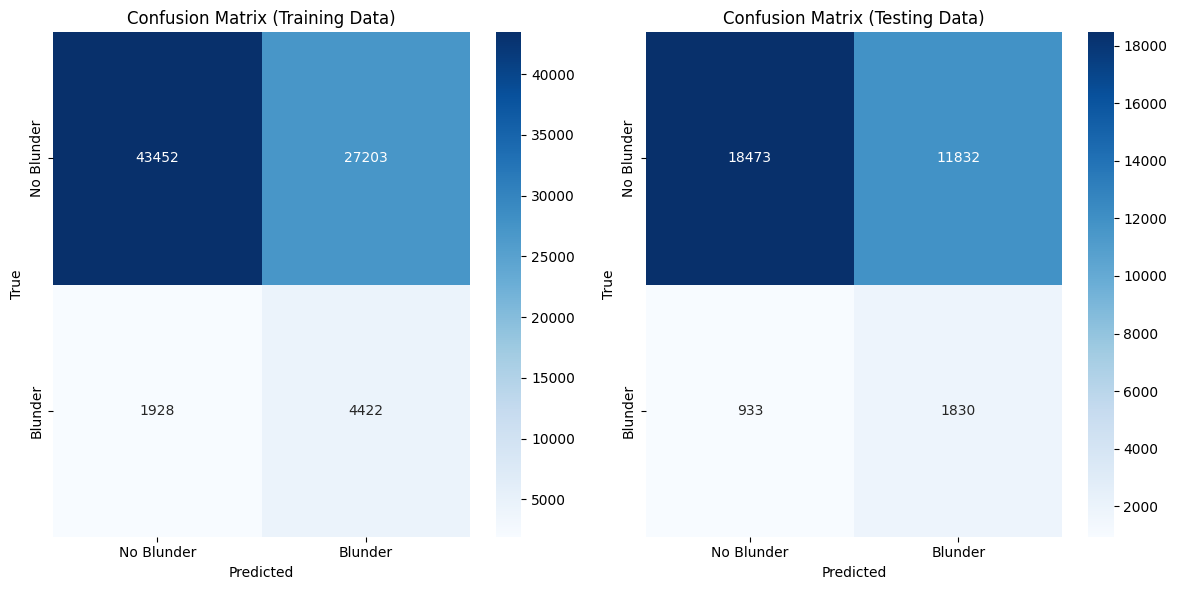

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for heatmap visualization

# Assuming train_clean_encoded and test_clean_encoded are already defined
# train_clean_encoded: Features for training data
# test_clean_encoded: Features for testing data

logreg = LogisticRegression(max_iter=1000, class_weight='balanced')  # Adding class_weight='balanced' to handle imbalanced classes

# Step 3: Train the model on the training data
logreg.fit(X_train_clean_encoded, y_train)

# Step 4: Make predictions on both training and testing data
y_train_pred = logreg.predict(X_train_clean_encoded)
y_test_pred = logreg.predict(X_test_clean_encoded)

# Step 5: Evaluate the model using F1 Score for both training and testing data
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

# Step 6: Compute confusion matrix for both training and testing data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Print F1 Scores
print(f"F1 Score (Training Data): {f1_train:.4f}")
print(f"F1 Score (Testing Data): {f1_test:.4f}")

# Print Confusion Matrices
print("\nConfusion Matrix (Training Data):")
print(conf_matrix_train)

print("\nConfusion Matrix (Testing Data):")
print(conf_matrix_test)

# Step 7: Visualize the confusion matrices using seaborn heatmap
# Training confusion matrix heatmap
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['No Blunder', 'Blunder'], yticklabels=['No Blunder', 'Blunder'])
plt.title('Confusion Matrix (Training Data)')
plt.xlabel('Predicted')
plt.ylabel('True')

# Testing confusion matrix heatmap
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['No Blunder', 'Blunder'], yticklabels=['No Blunder', 'Blunder'])
plt.title('Confusion Matrix (Testing Data)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()


**Naive Bayes**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


F1 Score (Training Data): 0.2102
F1 Score (Testing Data): 0.1909

Confusion Matrix (Training Data):
[[42190 28465]
 [ 2262  4088]]

Confusion Matrix (Testing Data):
[[17757 12548]
 [ 1147  1616]]


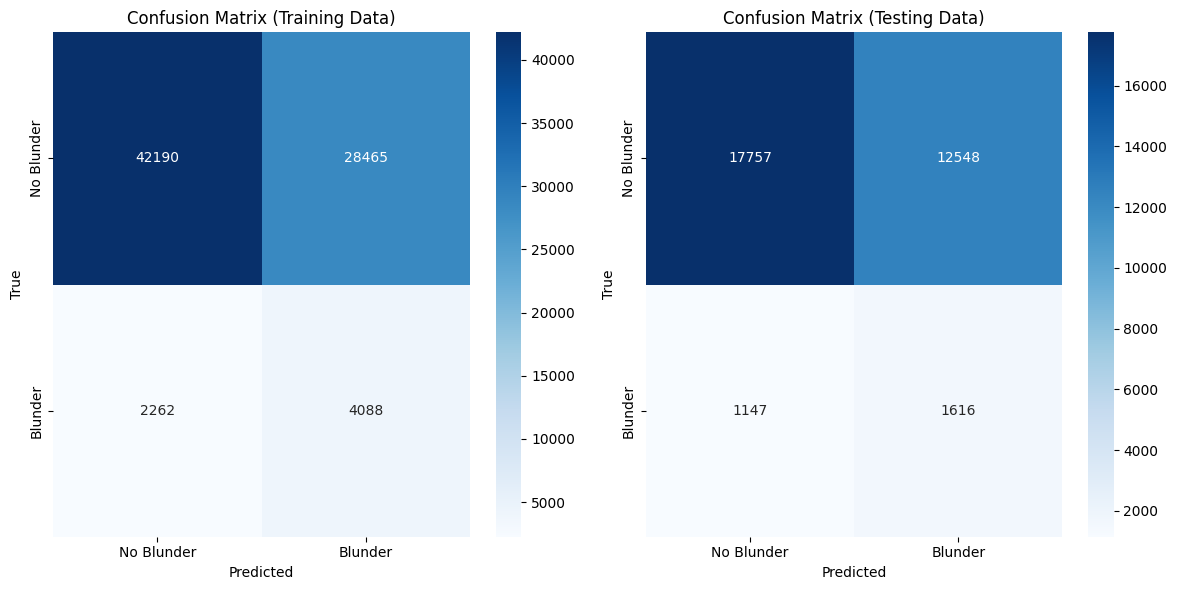

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB  # Import GaussianNB for Naive Bayes
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for heatmap visualization

# Assuming X_train_clean_encoded, y_train, X_test_clean_encoded, y_test are already defined

# Initialize the Gaussian Naive Bayes classifier
nb = GaussianNB()

# Step 3: Train the model on the training data
nb.fit(X_train_clean_encoded, y_train)

# Step 4: Make predictions on both training and testing data
y_train_pred = nb.predict(X_train_clean_encoded)
y_test_pred = nb.predict(X_test_clean_encoded)

# Step 5: Evaluate the model using F1 Score for both training and testing data
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

# Step 6: Compute confusion matrix for both training and testing data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Print F1 Scores
print(f"F1 Score (Training Data): {f1_train:.4f}")
print(f"F1 Score (Testing Data): {f1_test:.4f}")

# Print Confusion Matrices
print("\nConfusion Matrix (Training Data):")
print(conf_matrix_train)

print("\nConfusion Matrix (Testing Data):")
print(conf_matrix_test)

# Step 7: Visualize the confusion matrices using seaborn heatmap
plt.figure(figsize=(12, 6))

# Training confusion matrix heatmap
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Blunder', 'Blunder'],
            yticklabels=['No Blunder', 'Blunder'])
plt.title('Confusion Matrix (Training Data)')
plt.xlabel('Predicted')
plt.ylabel('True')

# Testing confusion matrix heatmap
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Blunder', 'Blunder'],
            yticklabels=['No Blunder', 'Blunder'])
plt.title('Confusion Matrix (Testing Data)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

# Define parameter grids for each classifier variant, including default parameters.
param_grids = {
    'GaussianNB': {
        # np.logspace(-12, -7, 6) produces: [1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7]
        'var_smoothing': np.logspace(-12, -7, 6)
    },
    'BernoulliNB': {
        # Default alpha is 1.0 and default fit_prior is True, so we include those along with other options.
        'alpha': [0, 0.1, 0.5, 1.0, 2.0, 5.0],
        'fit_prior': [True, False]
    },
    'MultinomialNB': {
        # Default alpha is 1.0 and default fit_prior is True, so we include those along with other options.
        'alpha': [0, 0.1, 0.5, 1.0, 2.0, 5.0],
        'fit_prior': [True, False]
    }
}

# Define the classifiers
classifiers = {
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'MultinomialNB': MultinomialNB()
}

results = {}

for name in classifiers.keys():
    print(f"=== Tuning {name} ===")
    clf = classifiers[name]
    param_grid = param_grids[name]

    # Setup GridSearchCV with 5-fold cross-validation using F1 score
    grid = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='f1', cv=5)
    grid.fit(X_train_clean_encoded, y_train)

    best_clf = grid.best_estimator_
    print(f"Best parameters for {name}: {grid.best_params_}")
    print(f"Best cross-validation F1 score for {name}: {grid.best_score_:.4f}")

    # Evaluate the best estimator on both training and testing data
    y_train_pred = best_clf.predict(X_train_clean_encoded)
    y_test_pred = best_clf.predict(X_test_clean_encoded)

    f1_train = f1_score(y_train, y_train_pred)
    f1_test = f1_score(y_test, y_test_pred)

    print(f"F1 Score (Training Data): {f1_train:.4f}")
    print(f"F1 Score (Testing Data): {f1_test:.4f}\n")

    # Store the results
    results[name] = {
        'Best_Params': grid.best_params_,
        'CV_F1': grid.best_score_,
        'F1_Train': f1_train,
        'F1_Test': f1_test
    }

# Optional: Display a summary DataFrame of the results
results_df = pd.DataFrame(results).T
print("Summary of Tuning Results:")
print(results_df)


=== Tuning GaussianNB ===
Best parameters for GaussianNB: {'var_smoothing': 1e-11}
Best cross-validation F1 score for GaussianNB: 0.1911
F1 Score (Training Data): 0.1917
F1 Score (Testing Data): 0.1845

=== Tuning BernoulliNB ===


/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:1209: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:1224: RuntimeWarning: divide by zero encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:1209: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:1224: RuntimeWarning: divide by zero encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/usr/local/lib/python3.11/

Best parameters for BernoulliNB: {'alpha': 0.1, 'fit_prior': True}
Best cross-validation F1 score for BernoulliNB: 0.1903
F1 Score (Training Data): 0.1903
F1 Score (Testing Data): 0.1849

=== Tuning MultinomialNB ===


/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:898:

Best parameters for MultinomialNB: {'alpha': 5.0, 'fit_prior': True}
Best cross-validation F1 score for MultinomialNB: 0.1905
F1 Score (Training Data): 0.1897
F1 Score (Testing Data): 0.1799

Summary of Tuning Results:
                                     Best_Params     CV_F1  F1_Train   F1_Test
GaussianNB              {'var_smoothing': 1e-11}  0.191065   0.19168  0.184453
BernoulliNB    {'alpha': 0.1, 'fit_prior': True}  0.190268  0.190294  0.184872
MultinomialNB  {'alpha': 5.0, 'fit_prior': True}  0.190482  0.189679  0.179936


**Random Forest**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


F1 Score (Training Data): 0.2388
F1 Score (Testing Data): 0.1999

Confusion Matrix (Training Data):
[[33963 36692]
 [  515  5835]]

Confusion Matrix (Testing Data):
[[14006 16299]
 [  646  2117]]


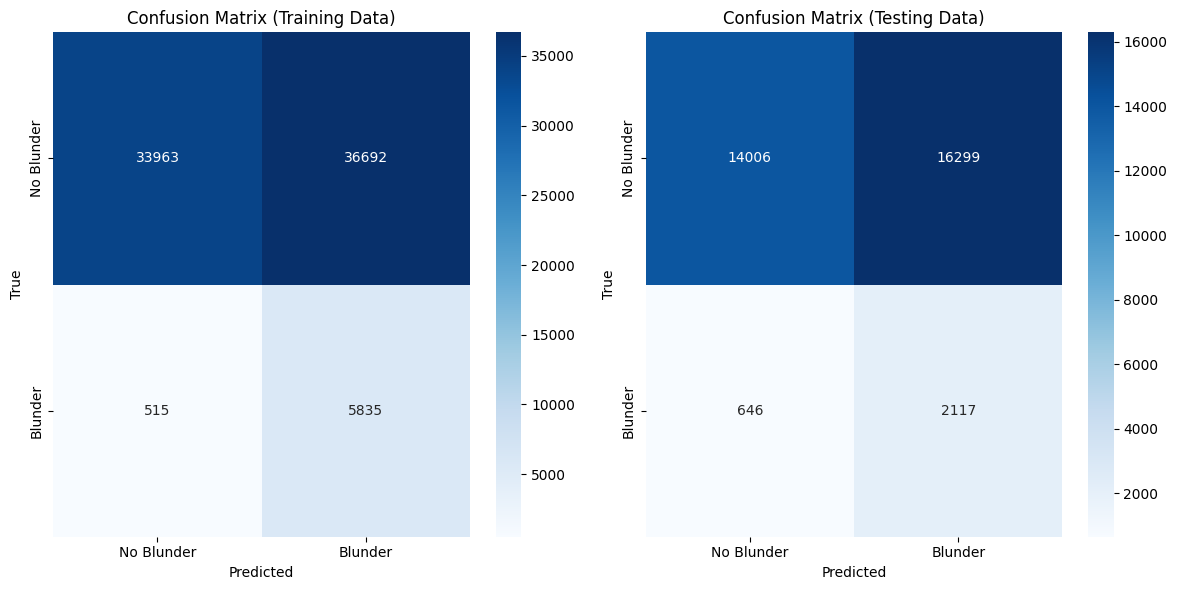

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # For heatmap visualization

# Create the Random Forest model with regularization to combat overfitting
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=300,            # More trees (optional, increases model stability)
    max_depth=10,                # Limiting the depth of trees to prevent overfitting
    min_samples_split=2,        # Minimum number of samples required to split a node
    min_samples_leaf=1,          # Minimum number of samples required to be in a leaf node
    max_features=0.9,         # Randomly select a subset of features for each split
    class_weight='balanced',     # Use class weights for imbalanced classes
    n_jobs=-1                    # Use all CPU cores to speed up training
)

# Best Hyperparameters Found:  {'bootstrap': False, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


# Step 3: Train the model on the training data
rf_model.fit(X_train_clean_encoded, y_train)

# Step 4: Make predictions using the random forest model
y_train_pred_rf = rf_model.predict(X_train_clean_encoded)
y_test_pred_rf = rf_model.predict(X_test_clean_encoded)

# Step 5: Evaluate the model using F1 Score for both training and testing data
f1_train_rf = f1_score(y_train, y_train_pred_rf)
f1_test_rf = f1_score(y_test, y_test_pred_rf)

# Step 6: Compute confusion matrix for both training and testing data
conf_matrix_train_rf = confusion_matrix(y_train, y_train_pred_rf)
conf_matrix_test_rf = confusion_matrix(y_test, y_test_pred_rf)

# Print F1 Scores
print(f"F1 Score (Training Data): {f1_train_rf:.4f}")
print(f"F1 Score (Testing Data): {f1_test_rf:.4f}")

# Print Confusion Matrices
print("\nConfusion Matrix (Training Data):")
print(conf_matrix_train_rf)

print("\nConfusion Matrix (Testing Data):")
print(conf_matrix_test_rf)

# Step 7: Visualize the confusion matrices using seaborn heatmap
plt.figure(figsize=(12, 6))

# Training confusion matrix heatmap
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Blunder', 'Blunder'],
            yticklabels=['No Blunder', 'Blunder'])
plt.title('Confusion Matrix (Training Data)')
plt.xlabel('Predicted')
plt.ylabel('True')

# Testing confusion matrix heatmap
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Blunder', 'Blunder'],
            yticklabels=['No Blunder', 'Blunder'])
plt.title('Confusion Matrix (Testing Data)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

Fitting 2 folds for each of 64 candidates, totalling 128 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
64 fits failed out of a total of 128.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Best Hyperparameters Found:  {'bootstrap': False, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
F1 Score (Training Data): 0.1978
F1 Score (Testing Data): 0.1940

Confusion Matrix (Training Data):
[[27811 42844]
 [  952  5398]]

Confusion Matrix (Testing Data):
[[11625 18680]
 [  460  2303]]


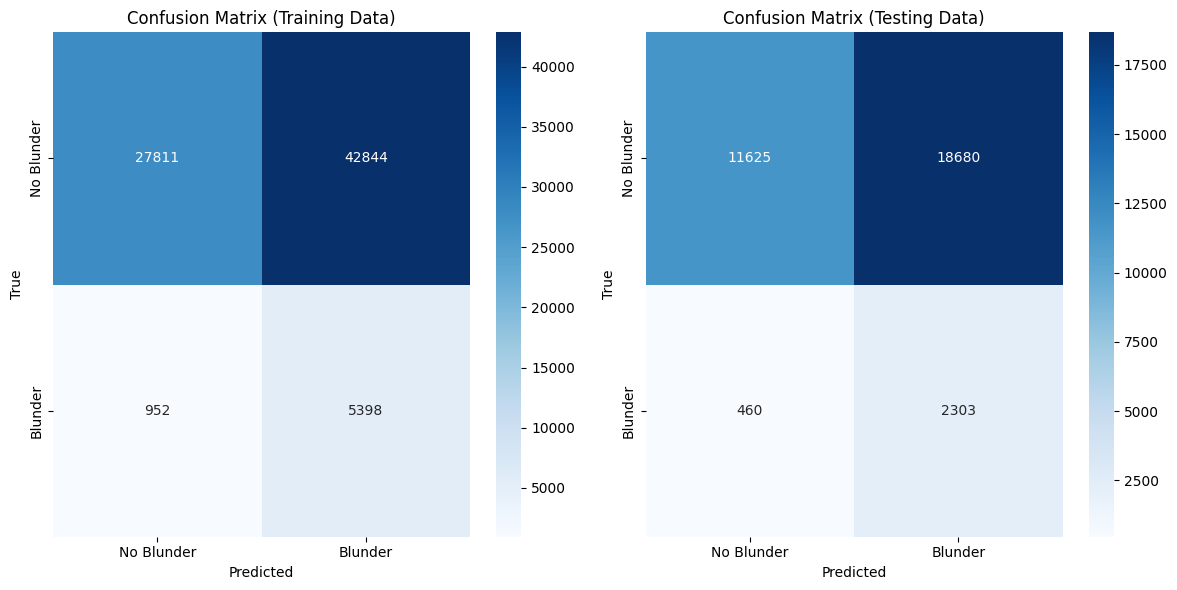

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # For heatmap visualization

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250],               # Number of trees in the forest
    'max_depth': [5, 10, 15, 20],                  # Depth of trees, None allows unlimited depth
    'min_samples_split': [2, 5, 10, 15],                  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4, 5],                     # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None],      # Number of features to consider for a split
    'bootstrap': [True, False],                           # Whether to use bootstrap samples for building trees
    'class_weight': ['balanced', None]                    # Optional: Try without balancing to compare
}

# Set up RandomizedSearchCV with 2-fold cross-validation and a maximum of 20 iterations
random_search = RandomizedSearchCV(estimator=rf_model,
                                   param_distributions=param_dist,
                                   n_iter=20,                    # Limit to 20 random combinations
                                   cv=2,                         # 2-fold cross-validation
                                   scoring='f1',                 # Optimize for F1 score
                                   verbose=2,                    # Show detailed output
                                   n_jobs=-1,                    # Use all CPU cores
                                   random_state=42)              # Ensure reproducibility

# Train the model with RandomizedSearchCV
random_search.fit(X_train_clean_encoded, y_train)

# Print the best parameters found by RandomizedSearchCV
print("Best Hyperparameters Found: ", random_search.best_params_)

# Evaluate the best model on both the training and testing data
best_rf_model = random_search.best_estimator_

# Predictions for both training and testing data
y_train_pred = best_rf_model.predict(X_train_clean_encoded)
y_test_pred = best_rf_model.predict(X_test_clean_encoded)

# Evaluate the model using F1 Score for both training and testing data
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

# Compute confusion matrix for both training and testing data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Print F1 Scores
print(f"F1 Score (Training Data): {f1_train:.4f}")
print(f"F1 Score (Testing Data): {f1_test:.4f}")

# Print Confusion Matrices
print("\nConfusion Matrix (Training Data):")
print(conf_matrix_train)

print("\nConfusion Matrix (Testing Data):")
print(conf_matrix_test)

# Visualize the confusion matrices using seaborn heatmap
plt.figure(figsize=(12, 6))

# Training confusion matrix heatmap
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['No Blunder', 'Blunder'], yticklabels=['No Blunder', 'Blunder'])
plt.title('Confusion Matrix (Training Data)')
plt.xlabel('Predicted')
plt.ylabel('True')

# Testing confusion matrix heatmap
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['No Blunder', 'Blunder'], yticklabels=['No Blunder', 'Blunder'])
plt.title('Confusion Matrix (Testing Data)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()


**Boosting Model**

In [ ]:
!pip install optuna xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.5 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/xgboost/data.py:575: UserWarning: Sparse arrays from pandas are converted into dense.
  warnings.warn("Sparse arrays from pandas are converted into dense.")
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:21:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "beta", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/data.py:575: UserWarning: Sparse arrays from pandas are converted into dense.
  warnings.warn("Sparse arrays from pandas are converted into dense.")
/usr/local/lib/python3.11/dist-packages/xgboost/data.py:575: UserWarning: Sparse arrays from pandas are converted into dense.
  warnings.warn("Sparse arrays from pandas are converted into dense.")


F1 Score (Training Data): 0.4060
F1 Score (Testing Data): 0.2348

Confusion Matrix (Training Data):
[[57338 13317]
 [ 1340  5010]]

Confusion Matrix (Testing Data):
[[23289  7016]
 [ 1462  1301]]


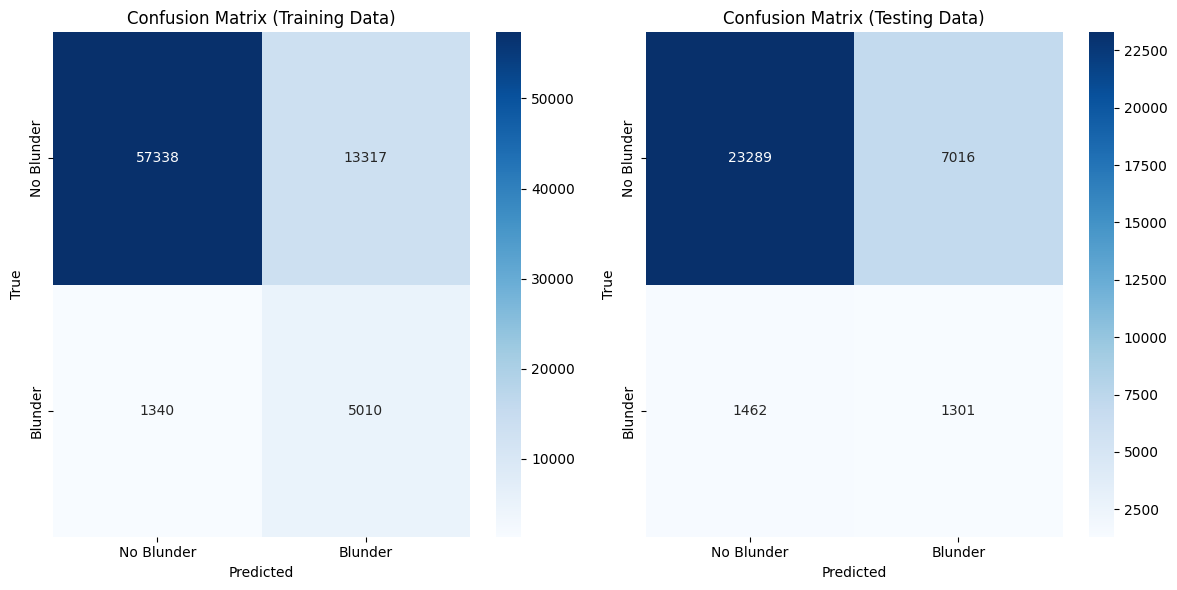

In [ ]:
import xgboost as xgb
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # For heatmap visualization

def custom_objective(y_true, y_pred):
    """
    Custom loss function to penalize false negatives (misclassification of blunders) more.
    """
    # Sigmoid to convert raw predictions (logits) into probabilities
    y_pred = 1.0 / (1.0 + np.exp(-y_pred))

    # Calculate the gradient (first derivative) and hessian (second derivative) for logistic loss
    grad = y_pred - y_true
    hess = y_pred * (1.0 - y_pred)  # Standard logistic regression hessian

    # Apply penalty on False Negatives (misclassifying "Blunder" as "No Blunder")
    penalty_factor = 10  # This factor controls how much more we penalize "Blunder" misclassifications
    grad[y_true == 1] *= penalty_factor  # Apply penalty for misclassifying blunders as "No Blunder"

    return grad, hess


# Assuming custom_objective is defined elsewhere
xgb_model = xgb.XGBClassifier(
    random_state=42,
    n_estimators=1000,          # Number of boosting rounds (trees)
    max_depth=3,               # Limiting tree depth to avoid overfitting
    min_child_weight=2,        # Higher min_child_weight to avoid overfitting
    learning_rate=0.05,        # Lower learning rate to allow the model to learn more gradually
    subsample=0.9,             # Use 90% of the data for each boosting round
    colsample_bytree=0.8,      # Use 80% of features for each tree
    scale_pos_weight=10,       # Increase weight for the positive class (blunders)
    use_label_encoder=False,   # No label encoding needed
    eval_metric='logloss',     # Use logloss evaluation metric
    alpha=5,
    beta=50,
    objective=custom_objective  # Custom loss function to penalize false negatives more
)

# Step 1: Fit the model on training data
xgb_model.fit(X_train_clean_encoded, y_train)

# Step 2: Make predictions on both training and testing data
y_train_pred_xgb = xgb_model.predict(X_train_clean_encoded)
y_test_pred_xgb = xgb_model.predict(X_test_clean_encoded)

# Step 3: Calculate F1 scores for both training and testing data
f1_train_xgb = f1_score(y_train, y_train_pred_xgb)
f1_test_xgb = f1_score(y_test, y_test_pred_xgb)

# Print F1 Scores
print(f"F1 Score (Training Data): {f1_train_xgb:.4f}")
print(f"F1 Score (Testing Data): {f1_test_xgb:.4f}")

# Step 4: Compute confusion matrix for both training and testing data
conf_matrix_train_xgb = confusion_matrix(y_train, y_train_pred_xgb)
conf_matrix_test_xgb = confusion_matrix(y_test, y_test_pred_xgb)

# Print Confusion Matrices
print("\nConfusion Matrix (Training Data):")
print(conf_matrix_train_xgb)

print("\nConfusion Matrix (Testing Data):")
print(conf_matrix_test_xgb)

# Step 5: Visualize the confusion matrices using seaborn heatmap
plt.figure(figsize=(12, 6))

# Training confusion matrix heatmap
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Blunder', 'Blunder'],
            yticklabels=['No Blunder', 'Blunder'])
plt.title('Confusion Matrix (Training Data)')
plt.xlabel('Predicted')
plt.ylabel('True')

# Testing confusion matrix heatmap
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Blunder', 'Blunder'],
            yticklabels=['No Blunder', 'Blunder'])
plt.title('Confusion Matrix (Testing Data)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()


In [ ]:
!pip install tqdm_joblib

/usr/local/lib/python3.11/dist-packages/xgboost/data.py:575: UserWarning: Sparse arrays from pandas are converted into dense.
  warnings.warn("Sparse arrays from pandas are converted into dense.")
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:07:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "beta", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/data.py:575: UserWarning: Sparse arrays from pandas are converted into dense.
  warnings.warn("Sparse arrays from pandas are converted into dense.")
/usr/local/lib/python3.11/dist-packages/xgboost/data.py:575: UserWarning: Sparse arrays from pandas are converted into dense.
  warnings.warn("Sparse arrays from pandas are converted into dense.")


F1 Score (Training Data): 0.4617
F1 Score (Testing Data): 0.2385

Confusion Matrix (Training Data):
[[59165 11490]
 [  995  5355]]

Confusion Matrix (Testing Data):
[[24266  6039]
 [ 1571  1192]]


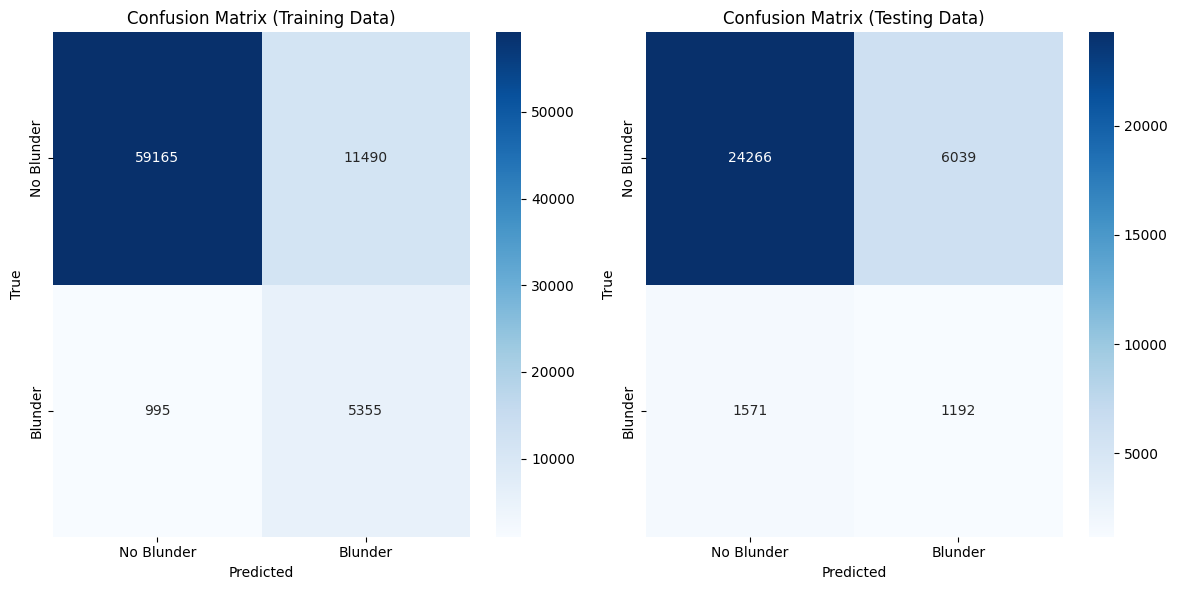

In [ ]:
import xgboost as xgb
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # For heatmap visualization

def custom_objective(y_true, y_pred):
    """
    Custom loss function to penalize false negatives (misclassification of blunders) more.
    """
    # Sigmoid to convert raw predictions (logits) into probabilities
    y_pred = 1.0 / (1.0 + np.exp(-y_pred))

    # Calculate the gradient (first derivative) and hessian (second derivative) for logistic loss
    grad = y_pred - y_true
    hess = y_pred * (1.0 - y_pred)  # Standard logistic regression hessian

    # Apply penalty on False Negatives (misclassifying "Blunder" as "No Blunder")
    penalty_factor = 10  # This factor controls how much more we penalize "Blunder" misclassifications
    grad[y_true == 1] *= penalty_factor  # Apply penalty for misclassifying blunders as "No Blunder"

    return grad, hess


# Assuming custom_objective is defined elsewhere
xgb_model = xgb.XGBClassifier(
    random_state=42,
    n_estimators=1000,          # Number of boosting rounds (trees)
    max_depth=3,               # Limiting tree depth to avoid overfitting
    min_child_weight=2,        # Higher min_child_weight to avoid overfitting
    learning_rate=0.1,        # Lower learning rate to allow the model to learn more gradually
    subsample=0.9,             # Use 90% of the data for each boosting round
    colsample_bytree=0.8,      # Use 80% of features for each tree
    scale_pos_weight=20,       # Increase weight for the positive class (blunders)
    use_label_encoder=False,   # No label encoding needed
    eval_metric='logloss',     # Use logloss evaluation metric
    alpha=8,
    beta=100,
    objective=custom_objective  # Custom loss function to penalize false negatives more
)

# Step 1: Fit the model on training data
xgb_model.fit(X_train_clean_encoded, y_train)

# Step 2: Make predictions on both training and testing data
y_train_pred_xgb = xgb_model.predict(X_train_clean_encoded)
y_test_pred_xgb = xgb_model.predict(X_test_clean_encoded)

# Step 3: Calculate F1 scores for both training and testing data
f1_train_xgb = f1_score(y_train, y_train_pred_xgb)
f1_test_xgb = f1_score(y_test, y_test_pred_xgb)

# Print F1 Scores
print(f"F1 Score (Training Data): {f1_train_xgb:.4f}")
print(f"F1 Score (Testing Data): {f1_test_xgb:.4f}")

# Step 4: Compute confusion matrix for both training and testing data
conf_matrix_train_xgb = confusion_matrix(y_train, y_train_pred_xgb)
conf_matrix_test_xgb = confusion_matrix(y_test, y_test_pred_xgb)

# Print Confusion Matrices
print("\nConfusion Matrix (Training Data):")
print(conf_matrix_train_xgb)

print("\nConfusion Matrix (Testing Data):")
print(conf_matrix_test_xgb)

# Step 5: Visualize the confusion matrices using seaborn heatmap
plt.figure(figsize=(12, 6))

# Training confusion matrix heatmap
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Blunder', 'Blunder'],
            yticklabels=['No Blunder', 'Blunder'])
plt.title('Confusion Matrix (Training Data)')
plt.xlabel('Predicted')
plt.ylabel('True')

# Testing confusion matrix heatmap
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Blunder', 'Blunder'],
            yticklabels=['No Blunder', 'Blunder'])
plt.title('Confusion Matrix (Testing Data)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()


**Tree Ensemble**

**Soft Voting**

In [ ]:
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix

# --- Soft Voting Ensemble ---
# Get predicted probabilities from both models
y_train_prob_rf = rf_model.predict_proba(X_train_clean_encoded)
y_train_prob_xgb = xgb_model.predict_proba(X_train_clean_encoded)
y_test_prob_rf  = rf_model.predict_proba(X_test_clean_encoded)
y_test_prob_xgb  = xgb_model.predict_proba(X_test_clean_encoded)

# Average the probabilities from both models
# Example: weighted averaging of probabilities
weight_xgb = 0.7
weight_rf = 0.3

ensemble_prob_train = weight_xgb * y_train_prob_xgb + weight_rf * y_train_prob_rf
ensemble_prob_test  = weight_xgb * y_test_prob_xgb  + weight_rf * y_test_prob_rf

y_train_pred_ensemble = np.argmax(ensemble_prob_train, axis=1)
y_test_pred_ensemble  = np.argmax(ensemble_prob_test, axis=1)


# Evaluate the ensemble's performance
f1_train_ensemble = f1_score(y_train, y_train_pred_ensemble)
f1_test_ensemble  = f1_score(y_test, y_test_pred_ensemble)

print(f"Ensemble F1 Score (Training Data): {f1_train_ensemble:.4f}")
print(f"Ensemble F1 Score (Testing Data): {f1_test_ensemble:.4f}")

# Compute confusion matrices for the ensemble predictions
conf_matrix_train_ensemble = confusion_matrix(y_train, y_train_pred_ensemble)
conf_matrix_test_ensemble  = confusion_matrix(y_test, y_test_pred_ensemble)

print("\nConfusion Matrix (Training Data):")
print(conf_matrix_train_ensemble)

print("\nConfusion Matrix (Testing Data):")
print(conf_matrix_test_ensemble)


Ensemble F1 Score (Training Data): 0.3578
Ensemble F1 Score (Testing Data): 0.2369

Confusion Matrix (Training Data):
[[53258 17397]
 [ 1176  5174]]

Confusion Matrix (Testing Data):
[[21963  8342]
 [ 1271  1492]]


**Stacking**

In [ ]:
pip install tqdm_joblib

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Assume X_train_clean_encoded, y_train, X_test_clean_encoded, y_test, and custom_objective are defined

# Initialize the base models without calibration
print("Initializing base models...")
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=300,            # More trees increases stability
    max_depth=5,                 # Limit tree depth to prevent overfitting
    min_samples_split=2,         # Minimum samples required to split a node
    min_samples_leaf=1,          # Minimum samples required in a leaf node
    max_features=0.9,            # Use 90% of features for each split
    class_weight='balanced',     # Account for imbalanced classes
    n_jobs=-1                    # Use all available CPU cores
)

print("Initializing XGBoost model...")
xgb_model = xgb.XGBClassifier(
    random_state=42,
    n_estimators=1000,          # Number of boosting rounds (trees)
    max_depth=3,                # Limit tree depth to avoid overfitting
    min_child_weight=2,         # Higher value to avoid overfitting
    learning_rate=0.05,         # Lower learning rate to learn gradually
    subsample=0.9,              # Use 90% of data for each boosting round
    colsample_bytree=0.8,       # Use 80% of features for each tree
    scale_pos_weight=10,        # Increase weight for the positive class (blunders)
    use_label_encoder=False,    # No label encoding needed
    eval_metric='logloss',      # Logloss evaluation metric
    alpha=5,
    beta=50,
    objective=custom_objective  # Custom loss to penalize false negatives more
)

# Define the stacking ensemble using the raw base models
print("Initializing stacking ensemble without calibration...")
stacking_ensemble = StackingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model)
    ],
    final_estimator=LogisticRegression(random_state=42, class_weight='balanced'),
    cv=4,             # Use 2-fold CV for generating meta-features
    passthrough=True, # Pass original features along with base model predictions
    verbose=10        # Increased verbosity to show internal training status
)

# Fit the stacking ensemble on the training data
print("Fitting stacking ensemble on training data...")
stacking_ensemble.fit(X_train_clean_encoded, y_train)
print("Stacking ensemble training complete.")

# Generate predictions on training and testing data
print("Generating predictions...")
y_train_pred_stack = stacking_ensemble.predict(X_train_clean_encoded)
y_test_pred_stack  = stacking_ensemble.predict(X_test_clean_encoded)

# Evaluate performance using F1 score
f1_train_stack = f1_score(y_train, y_train_pred_stack)
f1_test_stack  = f1_score(y_test, y_test_pred_stack)

print(f"Stacking Ensemble F1 Score (Training Data): {f1_train_stack:.4f}")
print(f"Stacking Ensemble F1 Score (Testing Data): {f1_test_stack:.4f}")

# Compute confusion matrices
conf_matrix_train_stack = confusion_matrix(y_train, y_train_pred_stack)
conf_matrix_test_stack  = confusion_matrix(y_test, y_test_pred_stack)

print("\nConfusion Matrix (Training Data):")
print(conf_matrix_train_stack)
print("\nConfusion Matrix (Testing Data):")
print(conf_matrix_test_stack)

# Visualize the confusion matrices using seaborn heatmaps
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train_stack, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Blunder', 'Blunder'],
            yticklabels=['No Blunder', 'Blunder'])
plt.title('Stacking Ensemble Confusion Matrix (Training Data)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test_stack, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Blunder', 'Blunder'],
            yticklabels=['No Blunder', 'Blunder'])
plt.title('Stacking Ensemble Confusion Matrix (Testing Data)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()


Initializing base models...
Initializing XGBoost model...
Initializing stacking ensemble without calibration...
Fitting stacking ensemble on training data...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:57:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "beta", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[Parallel(n_jobs=1)]: Done   0 tasks      | elapsed:    2.3s


KeyboardInterrupt: 

**Neural Network**

In [ ]:
X_train = torch.tensor(X_train_clean_encoded.to_numpy().astype(np.float32), dtype=torch.float32)
y_train = torch.tensor(y_train.astype(np.float32).reshape(-1, 1), dtype=torch.float32)
X_test = torch.tensor(X_test_clean_encoded.to_numpy().astype(np.float32), dtype=torch.float32)
y_test = torch.tensor(y_test.astype(np.float32).reshape(-1, 1), dtype=torch.float32)

AttributeError: 'Tensor' object has no attribute 'astype'

Epoch [1/20], Loss: 0.2780, Train F1: 0.1524
Epoch [2/20], Loss: 0.2640, Train F1: 0.1524
Epoch [3/20], Loss: 0.2640, Train F1: 0.1524
Epoch [4/20], Loss: 0.2640, Train F1: 0.1524
Epoch [5/20], Loss: 0.2640, Train F1: 0.1524
Epoch [6/20], Loss: 0.2640, Train F1: 0.1524
Epoch [7/20], Loss: 0.2640, Train F1: 0.1524
Epoch [8/20], Loss: 0.2640, Train F1: 0.1524
Epoch [9/20], Loss: 0.2640, Train F1: 0.1524
Epoch [10/20], Loss: 0.2640, Train F1: 0.1524
Epoch [11/20], Loss: 0.2640, Train F1: 0.1524
Epoch [12/20], Loss: 0.2640, Train F1: 0.1524
Epoch [13/20], Loss: 0.2640, Train F1: 0.1524
Epoch [14/20], Loss: 0.2640, Train F1: 0.1524
Epoch [15/20], Loss: 0.2640, Train F1: 0.1524
Epoch [16/20], Loss: 0.2640, Train F1: 0.1524
Epoch [17/20], Loss: 0.2640, Train F1: 0.1524
Epoch [18/20], Loss: 0.2640, Train F1: 0.1524
Epoch [19/20], Loss: 0.2640, Train F1: 0.1524
Epoch [20/20], Loss: 0.2640, Train F1: 0.1524
Test F1 Score: 0.0000
Train Confusion Matrix:
[[    0 70655]
 [    0  6350]]
Test Confusi

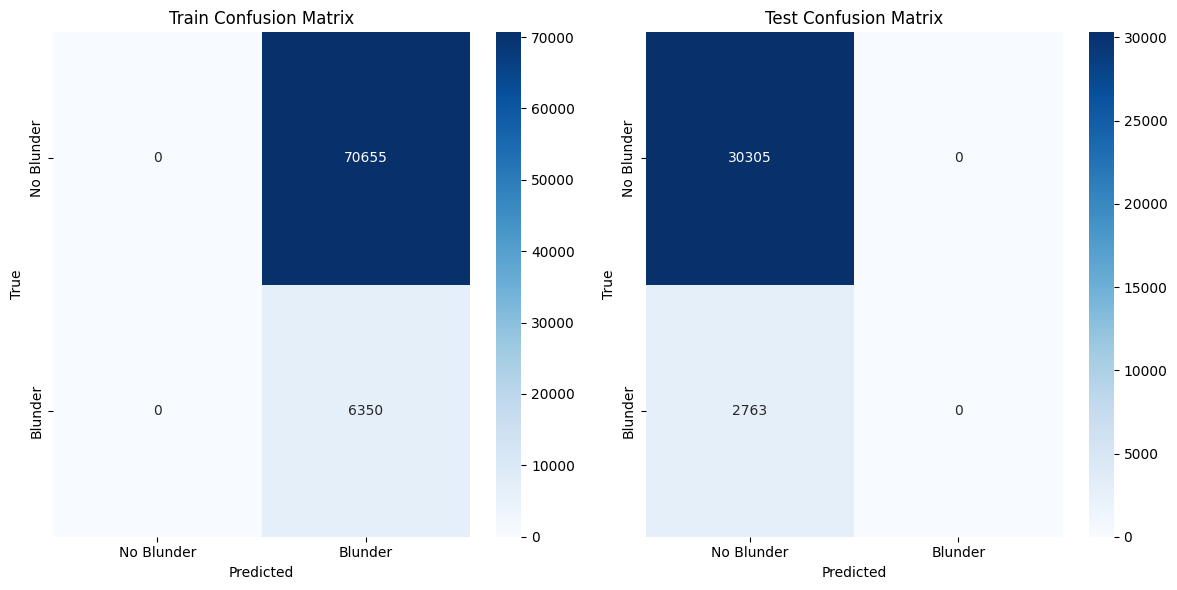

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assume your data is provided as DataFrames and converted to NumPy arrays
# X_train_clean_encoded, y_train, X_test_clean_encoded, y_test

# Convert the DataFrames to torch tensors (ensuring numeric type)

# Create datasets and dataloaders
batch_size = 32
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define a simple feed-forward neural network (without Sigmoid in final layer)
class FeedForwardNet(nn.Module):
    def __init__(self, input_dim):
        super(FeedForwardNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(32, 1)  # No Sigmoid here; BCEWithLogitsLoss expects raw logits
        )

    def forward(self, x):
        return self.net(x)

input_dim = X_train.shape[1]
model = FeedForwardNet(input_dim)

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Compute pos_weight for the minority class
# pos_count = (y_train.numpy() == 1).sum()
# neg_count = (y_train.numpy() == 0).sum()
# pos_weight_value = neg_count / pos_count
pos_weight = torch.tensor(0.9, dtype=torch.float32, device=device)

# Define loss and optimizer using BCEWithLogitsLoss
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * X_batch.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)

    # Compute F1 on training data (apply sigmoid to get probabilities, then threshold at 0.5)
    model.eval()
    train_preds = []
    train_labels = []
    with torch.no_grad():
        for X_batch, y_batch in train_loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            probs = torch.sigmoid(outputs)  # convert logits to probabilities
            preds = (probs.cpu().numpy() > 0.05).astype(int)
            train_preds.extend(preds.flatten())
            train_labels.extend(y_batch.cpu().numpy().flatten())

    train_f1 = f1_score(train_labels, train_preds)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Train F1: {train_f1:.4f}")

# Evaluate on the test set
model.eval()
test_preds = []
test_labels = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        probs = torch.sigmoid(outputs)
        preds = (probs.cpu().numpy() > 0.5).astype(int)
        test_preds.extend(preds.flatten())
        test_labels.extend(y_batch.cpu().numpy().flatten())

test_f1 = f1_score(test_labels, test_preds)
print(f"Test F1 Score: {test_f1:.4f}")

# Compute confusion matrices for train and test sets
train_conf_matrix = confusion_matrix(train_labels, train_preds)
test_conf_matrix = confusion_matrix(test_labels, test_preds)

print("Train Confusion Matrix:")
print(train_conf_matrix)
print("Test Confusion Matrix:")
print(test_conf_matrix)

# Plot confusion matrices using seaborn heatmaps
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Blunder', 'Blunder'],
            yticklabels=['No Blunder', 'Blunder'])
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Blunder', 'Blunder'],
            yticklabels=['No Blunder', 'Blunder'])
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()


Columns that are not numeric: ['increment_code_10+0', 'increment_code_10+5', 'increment_code_15+10']


,increment_code_10+0
0,False
1,False
2,False
3,False
4,False
...,...
77000,False
77001,False
77002,False
77003,False
